#Trabajo Practico N° 1
Asignatura: **Introducción al Procesamiento Digital de Imágenes (PDI)**

Alumno: **Natalia R. Estrada** - email: nataliarominaestrada@gmail.com

La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.


####Desarrollo
Importamos las librerias necesarias

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

Genero una funcion que me permita graficar una imagen

In [ ]:
#Función para mostrar una imagen RGB
def print_image(image,title):
  fig, ax = plt.subplots(figsize=(10, 10))
  plt.imshow(image)
  plt.title(title)
  plt.show()

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [ ]:
#Función para convertir una imagen del espacio RGB al YIQ
def rgb_to_yiq(RGB):
    '''
    input: matriz de la imagen en formato RGB sin normalizar
    output: matriz de la imagen en formato YIQ
    '''
    rgb_to_yiq_matrix = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    #print("Matriz de conversion RGB a YIQ:")
    #print(rgb_to_yiq_matrix)

    #Se normalizan los valores de RGB entre 0.0 y 1.0
    RGB = RGB/255

    Y = rgb_to_yiq_matrix[0][0] * RGB[:,:,0] + rgb_to_yiq_matrix[0][1] * RGB[:,:,1] + rgb_to_yiq_matrix[0][2] * RGB[:,:,2]
    I = rgb_to_yiq_matrix[1][0] * RGB[:,:,0] + rgb_to_yiq_matrix[1][1] * RGB[:,:,1] + rgb_to_yiq_matrix[1][2] * RGB[:,:,2]
    Q = rgb_to_yiq_matrix[2][0] * RGB[:,:,0] + rgb_to_yiq_matrix[2][1] * RGB[:,:,1] + rgb_to_yiq_matrix[2][2] * RGB[:,:,2]

    YIQ = np.dstack((Y,I,Q))
    
    return YIQ

Genero una función que transforma la imagen desde el espacio YIQ al RGB.

In [ ]:
#Función para convertir una imagen del espacio YIQ al RGB 
def yiq_to_rgb(YIQ):
    '''
    input: matriz de la imagen en formato YIQ 
    output: matriz de la imagen en formato RGB (en bytes)
    '''
    yiq_to_rgb_matrix = np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    #print("Matriz de conversion YIQ a RGB:")
    #print(yiq_to_rgb_matrix)

    R = yiq_to_rgb_matrix[0][0] * YIQ[:,:,0] + yiq_to_rgb_matrix[0][1] * YIQ[:,:,1] + yiq_to_rgb_matrix[0][2] * YIQ[:,:,2]
    G = yiq_to_rgb_matrix[1][0] * YIQ[:,:,0] + yiq_to_rgb_matrix[1][1] * YIQ[:,:,1] + yiq_to_rgb_matrix[1][2] * YIQ[:,:,2]
    B = yiq_to_rgb_matrix[2][0] * YIQ[:,:,0] + yiq_to_rgb_matrix[2][1] * YIQ[:,:,1] + yiq_to_rgb_matrix[2][2] * YIQ[:,:,2]

    #Se controla que no haya pixeles con valores menores a 0 y mayores a 1 (Dadas las multiplicaciones y sumas realizadas,
    #puede ocurrir que un valor exceda un poco el límite de 255 o sea ligeramente menor a 0 ocasionando errores en la visualización)
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    #Se convierten los valores a byte (valores enteros de 0 a 255)
    R = (R*255).astype(int)
    G = (G*255).astype(int)
    B = (B*255).astype(int)    
    
    RGB = np.dstack((R,G,B))
    
    return RGB 

Genero una función para modificar la luminancia en mi imagen transformada.

In [ ]:
#Función para modificar la luminancia
def mod_luminance(alpha,YIQ, graph=0):
    '''
    input: alpha = coeficiente de luminancia
           YIQ = matriz de la imagen en el espacio YIQ
           graph = mostrar la imagen modificada (1--> SI ; 0---> NO)
    output: matriz de la imagen modificada en el espacio YIQ
    '''
    Y_new = YIQ[:,:,0] * alpha
    #Se controla que la luminancia no sea mayor a 1 para evitar que salga de rango
    for i in range(len(Y_new)):
        for j in range(len(Y_new[i])):
            if Y_new[i][j] > 1:
                Y_new[i][j] = 1
    YIQ_new = np.dstack((Y_new,YIQ[:,:,1],YIQ[:,:,2]))
    
    if graph==1:
      #Se convierte a RGB para graficar        
      rgb_out = yiq_to_rgb(YIQ_new)

      print_image(rgb_out,f'Alfa = {alpha}')

    return YIQ_new

Genero una función para modificar la saturacion en mi imagen transformada.

In [ ]:
#Funcion para modificar la saturación
def mod_saturation(beta,YIQ,graph=0):
    '''
    input: beta = coeficiente de saturación
           YIQ = matriz de la imagen en el espacio YIQ
           graph = mostrar la imagen modificada (1--> SI ; 0---> NO)
    output: matriz de la imagen modificada en el espacio YIQ
    '''
    I_new = YIQ[:,:,1] * beta
    #Se controla que los resultados esten entre -0.5957 y 0.5957 para evitar salir de rango
    for i in range(len(I_new)):
        for j in range(len(I_new[i])):
            if I_new[i][j] < -0.5957:
                I_new[i][j] = -0.5957
            if I_new[i][j] > 0.5957:
                I_new[i][j] = 0.5957
    
    Q_new = YIQ[:,:,2] * beta
    #Se controla que los resultados esten entre -0.5957 y 0.5957 para evitar salir de rango
    for i in range(len(Q_new)):
        for j in range(len(Q_new[i])):
            if Q_new[i][j] < -0.5226:
                Q_new[i][j] = -0.5226
            if Q_new[i][j] > 0.5226:
                Q_new[i][j] = 0.5226
                
    YIQ_new = np.dstack((YIQ[:,:,0],I_new,Q_new))

    if graph==1:
      #Se convierte a RGB para graficar        
      rgb_out = yiq_to_rgb(YIQ_new)

      print_image(rgb_out,f'Beta = {beta}')

    return YIQ_new

Genero una función para modificar la luminancia y saturacion en mi imagen transformada.

In [ ]:
#Función para modificar saturación y luminosidad al mismo tiempo
def mod_sat_lum(alpha, beta, YIQ, graph=0):
  '''
  alpha = coeficiente de luminancia
  beta = coeficiente de saturación
  YIQ = matriz de la imagen en el espacio YIQ
  graph = mostrar la imagen modificada (1--> SI ; 0---> NO)
  '''
  YIQ_mod = mod_luminance(alpha, YIQ, graph=0)
  YIQ_mod = mod_saturation(beta, YIQ_mod, graph=0)

  if graph==1:
    #Se convierte a RGB para graficar        
    rgb_original = yiq_to_rgb(YIQ)
    rgb_mod = yiq_to_rgb(YIQ_mod)

    fig, axs = plt.subplots(1, 2, figsize=(25,25))

    plt.subplot(1,2,1)
    plt.imshow(rgb_mod)
    plt.title(f"Imagen Modificada - Alfa = {alpha} - Beta = {beta}")
    
    plt.subplot(1,2,2)
    plt.imshow(rgb_original)
    plt.title(f"Imagen RGB original")
    
    plt.show()

  return YIQ_mod

##Bloque principal del programa.


1. Cargamos una imagen RGB

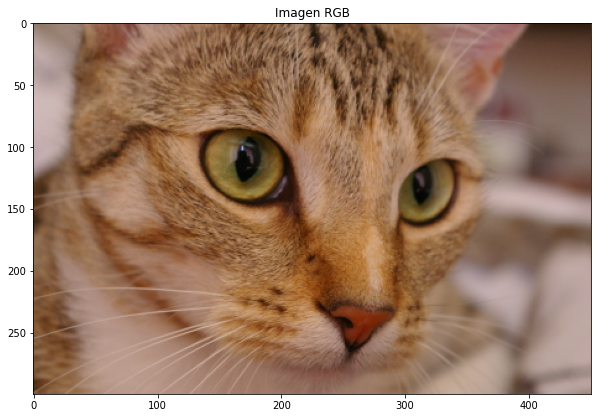

In [ ]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:chelsea.png')
print_image(img_rgb,'Imagen RGB')

2. Convertimos esa imagen RGB a YIQ

In [ ]:
# RGB -> YIQ (utilizando la segunda matriz)
YIQ = rgb_to_yiq(img_rgb)

*Nos podriamos asegurar que las funciones de transformación de espacios de color anteriores estan correctas transformando la imagen RGB a YIQ y viceversa, y observamos que no haya ninguna alteración en la imagen*

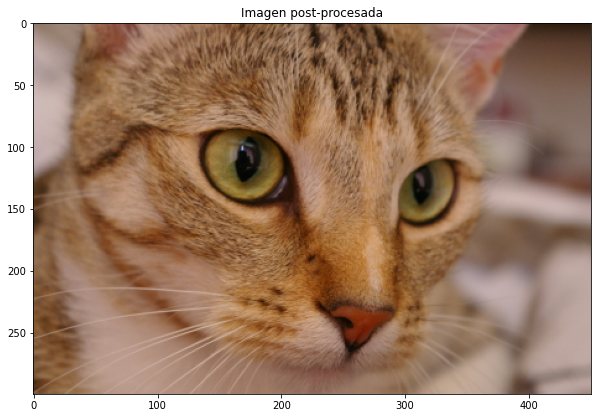

In [ ]:
RGB_out = yiq_to_rgb(YIQ)
print_image(RGB_out,'Imagen post-procesada')

*Si no se observan cambios con respecto a la imagen original, podemos asegurar que las funciones de conversión entre los espacios RGB e YIQ funcionan correctamente*

3. Modificamos la luminancia

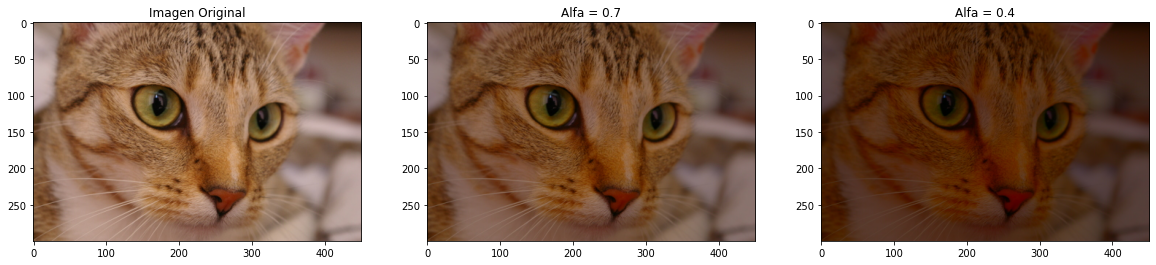

In [ ]:
# Luminancia con alfa = 0.7 y 0.4
alfa_1 = 0.7
alfa_2 = 0.4
YIQ_lum1 = mod_luminance(alfa_1,YIQ,graph=0)
YIQ_lum2 = mod_luminance(alfa_2,YIQ,graph=0)

#Se convierte la imagen a RGB para mostrar por pantalla
RGB_lum1 = yiq_to_rgb(YIQ_lum1)
RGB_lum2 = yiq_to_rgb(YIQ_lum2)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20,20)

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(RGB_lum1)
plt.title(f"Alfa = {alfa_1}")

plt.subplot(1,3,3)
plt.imshow(RGB_lum2)
plt.title(f"Alfa = {alfa_2}")

plt.show()

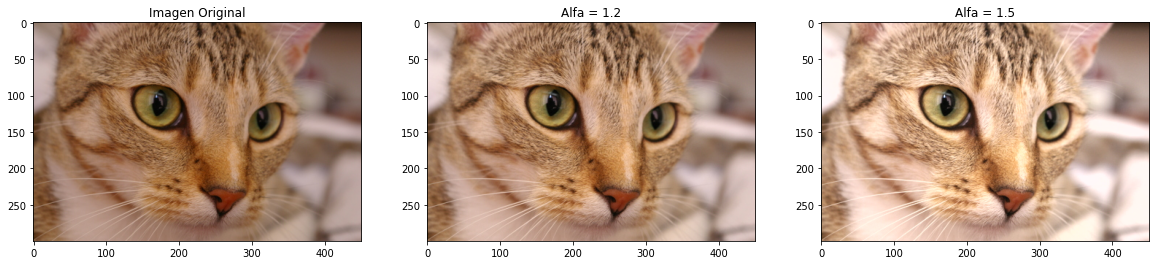

In [ ]:
# Luminancia con alfa = 1.2 y 1.5
alfa_3 = 1.2
alfa_4 = 1.5
YIQ_lum3 = mod_luminance(alfa_3,YIQ,graph=0)
YIQ_lum4 = mod_luminance(alfa_4,YIQ,graph=0)

#Se convierte la imagen a RGB para mostrar por pantalla
RGB_lum3 = yiq_to_rgb(YIQ_lum3)
RGB_lum4 = yiq_to_rgb(YIQ_lum4)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20,20)

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(RGB_lum3)
plt.title(f"Alfa = {alfa_3}")

plt.subplot(1,3,3)
plt.imshow(RGB_lum4)
plt.title(f"Alfa = {alfa_4}")

plt.show()

> *Al colocar un valor menor a 1 en alfa se observa una disminución en la luminosidad de la imagen. Mientras que al colocar un valor cercano a 2, observamos como aumenta el brillo o la claridad de la imagen a tal punto de llegar a "quemar" la imagen.*



4. Modificamos la saturacion de la imagen

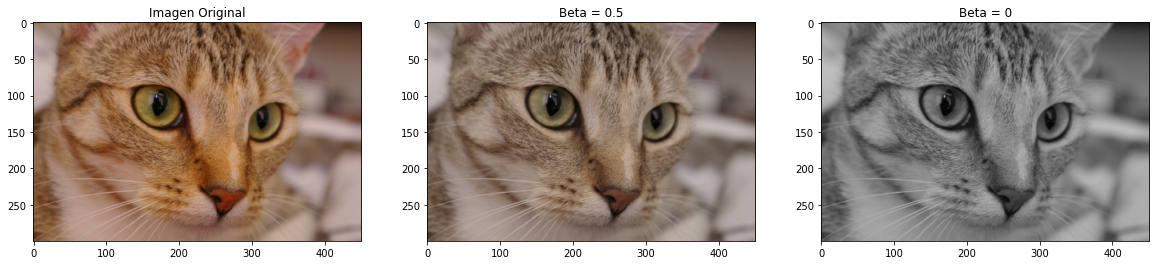

In [ ]:
# Saturacion con beta = 0.5 y 0
beta_1 = 0.5
beta_2 = 0
YIQ_sat1 = mod_saturation(beta_1,YIQ,graph=0)
YIQ_sat2 = mod_saturation(beta_2,YIQ,graph=0)

#Se convierte la imagen a RGB para mostrar por pantalla
RGB_sat1 = yiq_to_rgb(YIQ_sat1)
RGB_sat2 = yiq_to_rgb(YIQ_sat2)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20,20)

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(RGB_sat1)
plt.title(f"Beta = {beta_1}")

plt.subplot(1,3,3)
plt.imshow(RGB_sat2)
plt.title(f"Beta = {beta_2}")

plt.show()

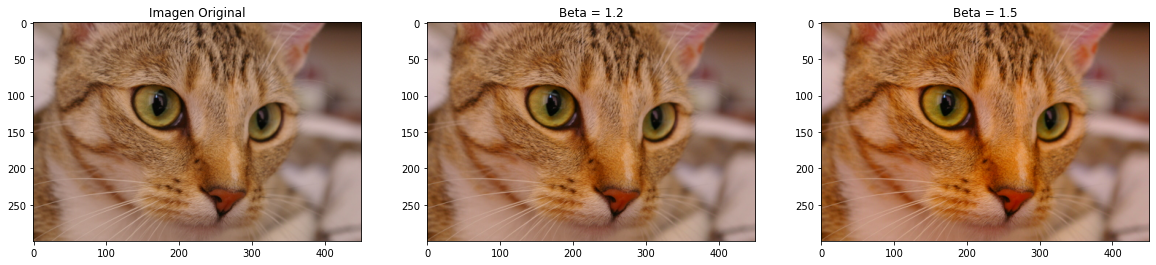

In [ ]:
# Saturacion con beta = 1.2 y 1.5
beta_3 = 1.2
beta_4 = 1.5
YIQ_sat3 = mod_saturation(beta_3,YIQ,graph=0)
YIQ_sat4 = mod_saturation(beta_4,YIQ,graph=0)

#Se convierte la imagen a RGB para mostrar por pantalla
RGB_sat3 = yiq_to_rgb(YIQ_sat3)
RGB_sat4 = yiq_to_rgb(YIQ_sat4)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20,20)

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(RGB_sat3)
plt.title(f"Beta = {beta_3}")

plt.subplot(1,3,3)
plt.imshow(RGB_sat4)
plt.title(f"Beta = {beta_4}")

plt.show()



> *Vemos como para un coeficiente de saturación igual a 0, la imagen pierde cualquier nivel de saturación que poseía, convirtiéndose en una imagen en blanco y negro. Por otro lado, al aumentar demasiado el coeficiente de saturación beta observamos una imagen con los colores demasiados saturados.*



5. Se modifica la luminancia y saturación de manera interactiva

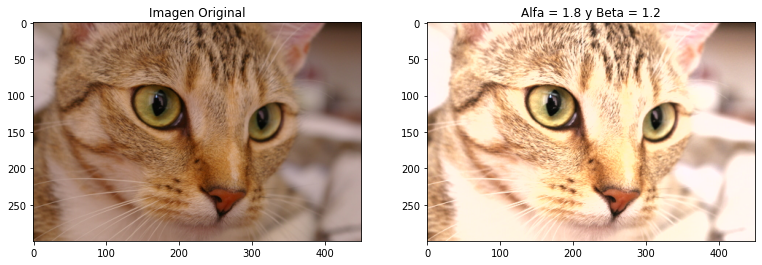

In [ ]:
# Luminancia con alfa = 1.8  y Saturacion con beta = 1.2
alfa = 1.8
beta = 1.2

YIQ_mod = mod_sat_lum(alfa, beta, YIQ)
#Se convierte la imagen a RGB para mostrar por pantalla
RGB_mod = yiq_to_rgb(YIQ_mod)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,20)

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(RGB_mod)
plt.title(f"Alfa = {alfa} y Beta = {beta}")

plt.show()